In [1]:
%matplotlib inline

import numpy as np
import random as r
import matplotlib.pyplot as plt
from beautifultable import BeautifulTable

# Perceptron

In [2]:
class Perceptron:
    __slots__ = 'bias', 'weights', 'output', 'inputs'
    
    def __init__(self, size):
        self.bias = r.random()
        self.weights = np.random.randn(size)
        self.output = None
        self.inputs = None
        
    def propagation(self, inputs):
        self.output = 1 * ((self.weights.dot(inputs) + self.bias) > 0)
        self.inputs = inputs
        
    def update(self, lr, output):
        error = output - self.output 
        if error:
            self.weights = np.array([w + lr * error * x \
                                    for x, w in np.column_stack((self.inputs, self.weights))])
            self.bias = self.bias + lr * error
            
    def data(self):
        return [self.bias, self.weights, self.inputs, self.output]

In [3]:
table = BeautifulTable()
table.columns.header = ["epoch", "bias", "weights", "inputs", "outputs correct", "outputs"]

In [4]:
def data(epoch, data, output_correct):
    data.insert(0, epoch + 1)
    data.insert(4, output_correct)
    return data

In [5]:
def simulation(epochs, dataset, perceptron, table):
    weights_log = [perceptron.weights]
    bias_log = [perceptron.bias]
    
    for epoch in range(epochs):
        for i in range(len(dataset)):
            perceptron.propagation(dataset[i, 0:3])
            table.rows.append(data(epoch, perceptron.data(), dataset[i, 3]))
            perceptron.update(lr=0.5, output=dataset[i, 3])
        weights_log = np.concatenate((weights_log, [perceptron.weights]), axis=0)
        bias_log.append(perceptron.bias)
            
    return weights_log, bias_log

In [6]:
def plot(log, title):
    plt.plot(log[0][:, 0])
    plt.plot(log[0][:, 1])
    plt.plot(log[0][:, 2])
    plt.plot(log[1])
    plt.title(title)
    plt.xlabel('epochs')
    plt.legend(['Weight 1', 'Weight 2', 'Weight 3', 'Bias'])
    plt.show()

## Caso Conjunción

In [7]:
conjunction = np.array([
    [1,1,1,1],
    [1,1,0,0],
    [1,0,1,0],
    [1,0,0,0],
    [0,1,1,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,0]
])

p_conjunction = Perceptron(3)

In [8]:
conjunction_log = simulation(30, conjunction, p_conjunction, table)

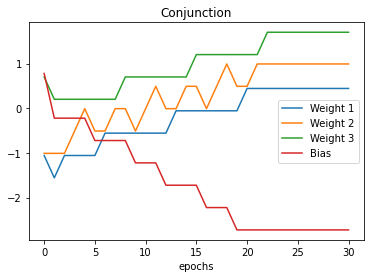

In [9]:
plot(conjunction_log, "Conjunction")

In [10]:
print(table)

+-------+--------+----------------------------+---------+------------+---------+
| epoch |  bias  |          weights           | inputs  | outputs co | outputs |
|       |        |                            |         |   rrect    |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.777  | [-1.05789193 -1.00989243   | [1 1 1] |     1      |    0    |
|       |        |        0.69975568]         |         |            |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 1.277  | [-0.55789193 -0.50989243   | [1 1 0] |     0      |    1    |
|       |        |        1.19975568]         |         |            |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.777  | [-1.05789193 -1.00989243   | [1 0 1] |     0      |    1    |
|       |        |        1.19975568]         |         |            |         |
+-------+--------+----------

## Caso Disyunción

In [11]:
disjunction = np.array([
    [1,1,1,1],
    [1,1,0,1],
    [1,0,1,1],
    [1,0,0,1],
    [0,1,1,1],
    [0,1,0,1],
    [0,0,1,1],
    [0,0,0,0]
])

p_disjunction = Perceptron(3)

table = BeautifulTable()
table.columns.header = ["epoch", "bias", "weights", "inputs", "outputs correct", "outputs"]

In [12]:
disjunction_log = simulation(30, disjunction, p_disjunction, table)

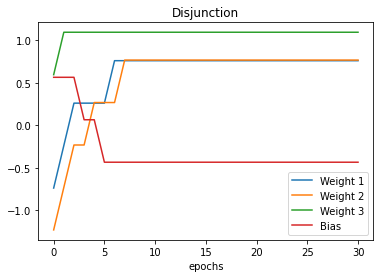

In [13]:
plot(disjunction_log, 'Disjunction')

In [14]:
print(table)

+-------+--------+----------------------------+---------+------------+---------+
| epoch |  bias  |          weights           | inputs  | outputs co | outputs |
|       |        |                            |         |   rrect    |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.565  | [-0.73931234 -1.23217229   | [1 1 1] |     1      |    0    |
|       |        |        0.59558098]         |         |            |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 1.065  | [-0.23931234 -0.73217229   | [1 1 0] |     1      |    1    |
|       |        |        1.09558098]         |         |            |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 1.065  | [-0.23931234 -0.73217229   | [1 0 1] |     1      |    1    |
|       |        |        1.09558098]         |         |            |         |
+-------+--------+----------

## Bicondicionalidad

In [15]:
biconditionality = np.array([
    [1,1,1,1],
    [1,1,0,0],
    [1,0,1,0],
    [1,0,0,0],
    [0,1,1,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]
])

p_biconditionality = Perceptron(3)

table = BeautifulTable()
table.columns.header = ["epoch", "bias", "weights", "inputs", "outputs correct", "outputs"]

In [16]:
biconditionality_log = simulation(100, biconditionality, p_biconditionality, table)

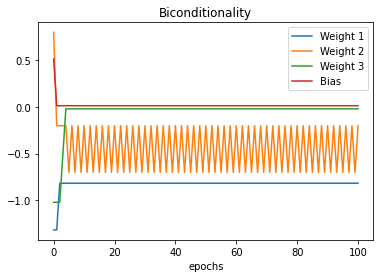

In [17]:
plot(biconditionality_log, 'Biconditionality')

In [18]:
print(table)

+-------+--------+----------------------------+---------+------------+---------+
| epoch |  bias  |          weights           | inputs  | outputs co | outputs |
|       |        |                            |         |   rrect    |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.512  | [-1.31753976  0.79830789 - | [1 1 1] |     1      |    0    |
|       |        |        1.02161682]         |         |            |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 1.012  | [-0.81753976  1.29830789 - | [1 1 0] |     0      |    1    |
|       |        |        0.52161682]         |         |            |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.512  | [-1.31753976  0.79830789 - | [1 0 1] |     0      |    0    |
|       |        |        0.52161682]         |         |            |         |
+-------+--------+----------

## Condicionalidad

In [19]:
conditionality = np.array([
    [1,1,1,1],
    [1,1,0,0],
    [1,0,1,1],
    [1,0,0,1],
    [0,1,1,1],
    [0,1,0,1],
    [0,0,1,1],
    [0,0,0,1]
])

p_conditionality = Perceptron(3)

table = BeautifulTable()
table.columns.header = ["epoch", "bias", "weights", "inputs", "outputs correct", "outputs"]

In [20]:
conditionalitysimulation(30, conditionality, p_conditionality, table)

(array([[ 1.77589348,  1.11781944, -0.01980585],
        [ 1.27589348,  0.61781944, -0.01980585],
        [ 0.77589348,  0.61781944,  0.48019415],
        [ 0.27589348,  0.61781944,  0.48019415],
        [ 0.27589348,  0.11781944,  0.48019415],
        [ 0.27589348,  0.11781944,  0.48019415],
        [-0.22410652,  0.11781944,  0.48019415],
        [-0.22410652, -0.38218056,  0.48019415],
        [-0.22410652, -0.38218056,  0.48019415],
        [-0.72410652, -0.38218056,  0.48019415],
        [-0.72410652, -0.88218056,  0.48019415],
        [-0.72410652, -0.88218056,  0.48019415],
        [-0.72410652, -0.88218056,  0.48019415],
        [-0.72410652, -0.88218056,  0.48019415],
        [-0.72410652, -0.88218056,  0.48019415],
        [-0.72410652, -0.88218056,  0.48019415],
        [-0.72410652, -0.88218056,  0.48019415],
        [-0.72410652, -0.88218056,  0.48019415],
        [-0.72410652, -0.88218056,  0.48019415],
        [-0.72410652, -0.88218056,  0.48019415],
        [-0.72410652

In [21]:
print(table)

+-------+--------+----------------------------+---------+------------+---------+
| epoch |  bias  |          weights           | inputs  | outputs co | outputs |
|       |        |                            |         |   rrect    |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.881  | [ 1.77589348  1.11781944 - | [1 1 1] |     1      |    1    |
|       |        |        0.01980585]         |         |            |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.881  | [ 1.77589348  1.11781944 - | [1 1 0] |     0      |    1    |
|       |        |        0.01980585]         |         |            |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.381  | [ 1.27589348  0.61781944 - | [1 0 1] |     1      |    1    |
|       |        |        0.01980585]         |         |            |         |
+-------+--------+----------